In [1]:
import os
import csv
import numpy as np
from fastdtw import fastdtw
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import torch

In [2]:
from utils import *

In [3]:
import argparse


parser = argparse.ArgumentParser()

parser.add_argument('--save', type=str, default='../garage/stocks/2/')


parser.add_argument('--remote', action='store_true', help='the code run on a server')
parser.add_argument('--num-gpu', type=int, default=0, help='the number of the gpu to use')
parser.add_argument('--epochs', type=int, default=200, help='train epochs')
parser.add_argument('--seed', type=int, default=100, help='seed')
parser.add_argument('--batch-size', type=int, default=64, help='batch size')
# parser.add_argument('--lr_decay_steps', type=int, nargs='+',default=[50,105,145], help='lr_decay_steps')
parser.add_argument('--lr_decay_steps', type=int, nargs='+',default=[15,50,105,145], help='lr_decay_steps')
parser.add_argument('--lr_decay_rate', type=float, default=0.13, help='lr_decay_rate')
parser.add_argument('--filename', type=str, default='metrla')
parser.add_argument('--train-ratio', type=float, default=0.6, help='the ratio of training dataset')
parser.add_argument('--valid-ratio', type=float, default=0.2, help='the ratio of validating dataset')
parser.add_argument('--his-length', type=int, default=12, help='the length of history time series of input')
parser.add_argument('--pred-length', type=int, default=12, help='the length of target time series for prediction')

parser.add_argument('--sigma1', type=float, default=0.1, help='sigma for the semantic matrix')
parser.add_argument('--sigma2', type=float, default=10, help='sigma for the spatial matrix')
parser.add_argument('--thres1', type=float, default=0.6, help='the threshold for the semantic matrix')
parser.add_argument('--thres2', type=float, default=0.5, help='the threshold for the spatial matrix')
parser.add_argument('--lr', type=float, default=2e-4, help='learning rate')

parser.add_argument('--log', action='store_true', help='if write log to files')
args = parser.parse_args([])

In [4]:
data, mean, std, dtw_matrix, sp_matrix = read_data(args)
train_loader, valid_loader, test_loader, train_mean, train_std, val_mean, val_std, test_mean, test_std = generate_dataset(data,args)

pemsbay


100%|██████████| 325/325 [00:10<00:00, 32.00it/s]


FileNotFoundError: [Errno 2] No such file or directory: './data/PEMSBAY/distance.csv'

In [ ]:
x,y = train_loader.dataset.__getitem__(0)

In [ ]:
x.shape

torch.Size([10, 12, 1])

In [ ]:
y.shape

torch.Size([10, 12])

In [ ]:
data.shape

torch.Size([207, 10, 1])

In [ ]:
d = np.load('./data/PEMS04/PEMS04.npz')

# d = np.load('/home/chri6578/Documents/GG_SPP/dataset/stocks_28.npz')

In [ ]:
dtw_d = np.load('./data/pems04_dtw_distance.npy')
spt_d = np.load('./data/pems04_spatial_distance.npy')

In [ ]:
dtw_d.shape, spt_d.shape

((307, 307), (307, 307))

In [ ]:
get_normalized_adj(dtw_d)

tensor([[4.0000e-01, 3.3628e-04, 2.5998e-04,  ..., 1.0645e-03, 3.3947e-04,
         1.1145e-03],
        [3.3628e-04, 4.0000e-01, 3.8137e-04,  ..., 1.5176e-03, 3.1923e-04,
         6.0231e-04],
        [2.5998e-04, 3.8137e-04, 4.0000e-01,  ..., 8.5500e-04, 5.3674e-04,
         1.0038e-03],
        ...,
        [1.0645e-03, 1.5176e-03, 8.5500e-04,  ..., 4.0000e-01, 1.4543e-03,
         2.2343e-03],
        [3.3947e-04, 3.1923e-04, 5.3674e-04,  ..., 1.4543e-03, 4.0000e-01,
         4.3012e-04],
        [1.1145e-03, 6.0231e-04, 1.0038e-03,  ..., 2.2343e-03, 4.3012e-04,
         4.0000e-01]])

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()

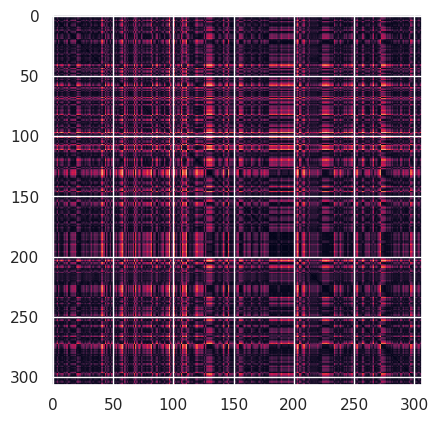

In [ ]:
plt.imshow(dtw_d)